In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Downloading the challenge datasets

In [2]:
# # Download the challenge set files

# from six.moves.urllib import request

# def get_file(fname):
#     url = "https://github.com/ahnitz/odw-storage/raw/master/{}"
#     url = url.format(fname)
#     request.urlretrieve(url, fname)
#     print('Getting : {}'.format(url))

# files = ['PyCBC_T2_0.gwf', 'PyCBC_T2_1.gwf', 'PyCBC_T2_2.gwf',
#          'PyCBC_T2_3.gwf', 'PyCBC_T2_4.gwf']

# for fname in files:
#     get_file(fname)

# PyCBC_T2_0.gwf

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


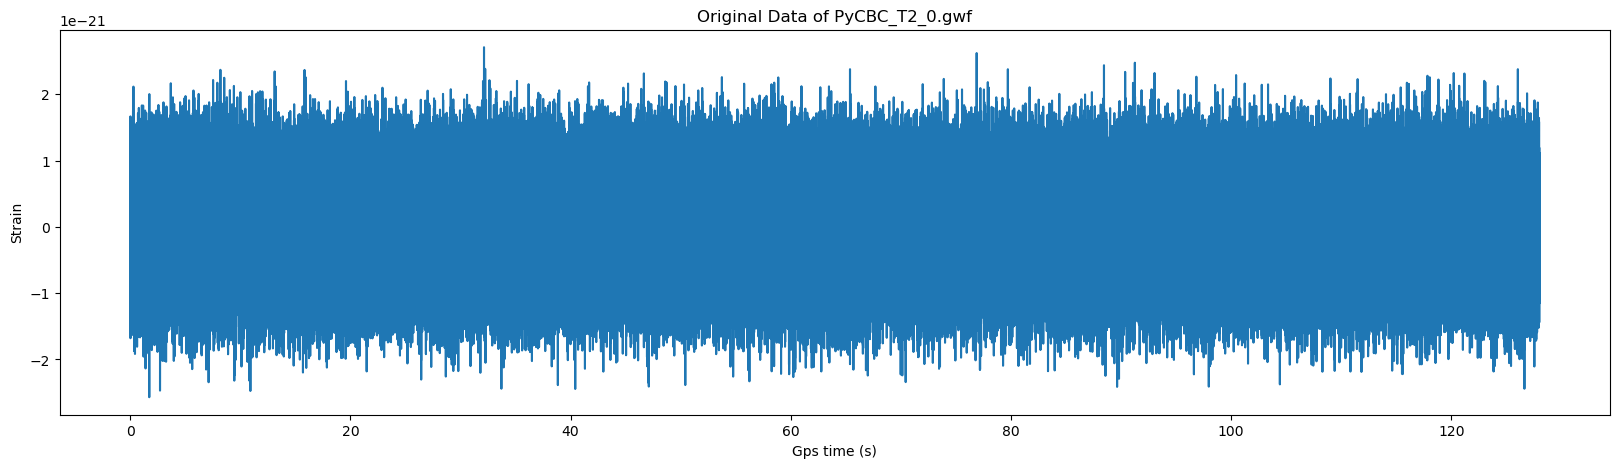

In [3]:
import pycbc.frame
import pylab

# Reading the strain data
file_name = "PyCBC_T2_0.gwf"
channel_name = "H1:TEST-STRAIN"

gps_start_time = 0
gps_end_time = 128

pycbc_t2_0 = pycbc.frame.read_frame(file_name, channel_name, gps_start_time, gps_end_time)

pylab.figure(figsize = (20, 5))
pylab.plot(pycbc_t2_0.sample_times, pycbc_t2_0)

pylab.title("Original Data of {}".format(file_name))
pylab.xlabel("Gps time (s)")
pylab.ylabel("Strain")

pylab.show()

## Applying High Pass Filter

**High-pass filters are often used to clean up low-frequency noise, remove humming sounds in audio signals, redirect higher frequency signals to appropriate speakers in sound systems, and remove low-frequency trends from time-series data, thereby highlighting the high-frequency trends.**

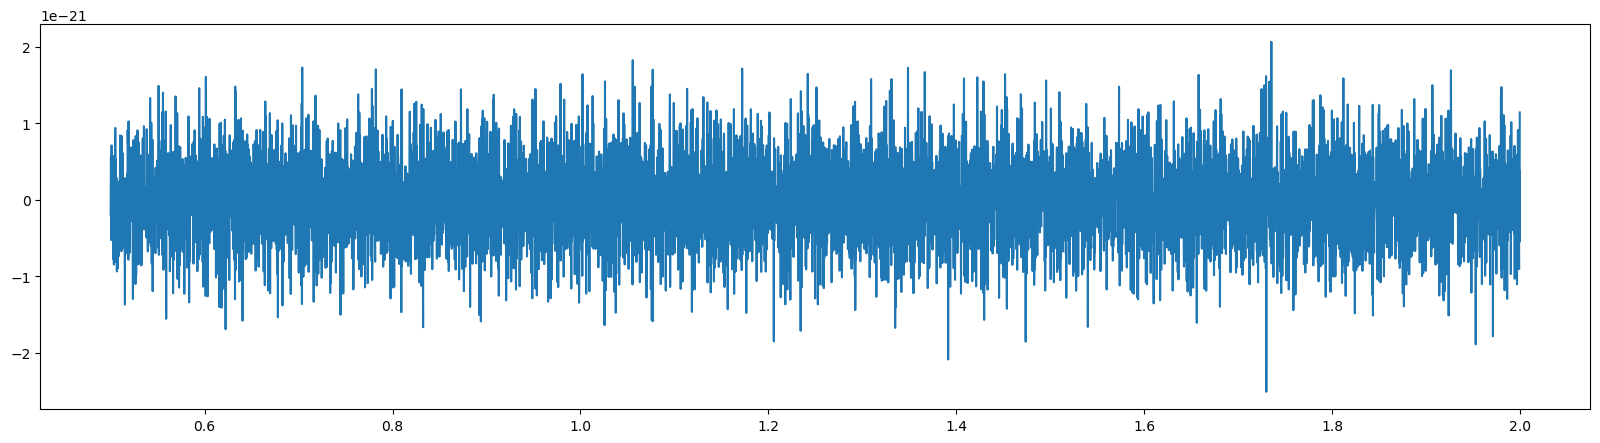

In [4]:
pylab.figure(figsize = (20, 5))

highpass_pycbc_t2_0 = pycbc_t2_0.highpass_fir(15, 512) # High pass at 15Hz
zoom = highpass_pycbc_t2_0.time_slice(pycbc_t2_0.start_time + 0.5, pycbc_t2_0.end_time - 126 )
pylab.plot(zoom.sample_times, zoom)

pylab.show()

## Power Spectral Density

**PSD is a measure of the power of a signal distributed over a range of frequencies. <br>It is useful tool for understanding the characteristics of a signal, as it can reveal the dominant freqs (frequencies that have the highest amplitudes or power levels in the signal.), the presence of noise, and other spectral properties.**

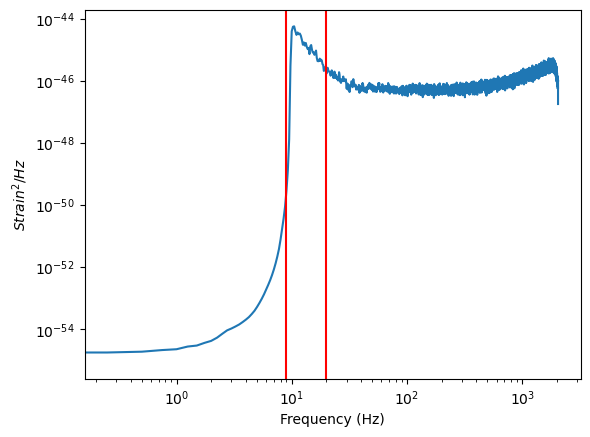

In [5]:
psd_pycbc_t2_0 = pycbc_t2_0.psd(4) # 4s long segments (Welch's method)

pylab.loglog(psd_pycbc_t2_0.sample_frequencies, psd_pycbc_t2_0)

# pylab.xlim(15, 2048)
# pylab.ylim(1e-47, 1e-45)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')

pylab.axvline(x = 9, color = 'red')
pylab.axvline(x = 20, color = 'red')

pylab.show()

**Dominant frequencies ranges from 10 to 10^3**

## Whitening the data

**To visualize deviations from the noise, it is useful to "whiten" the data within some frequency range.**

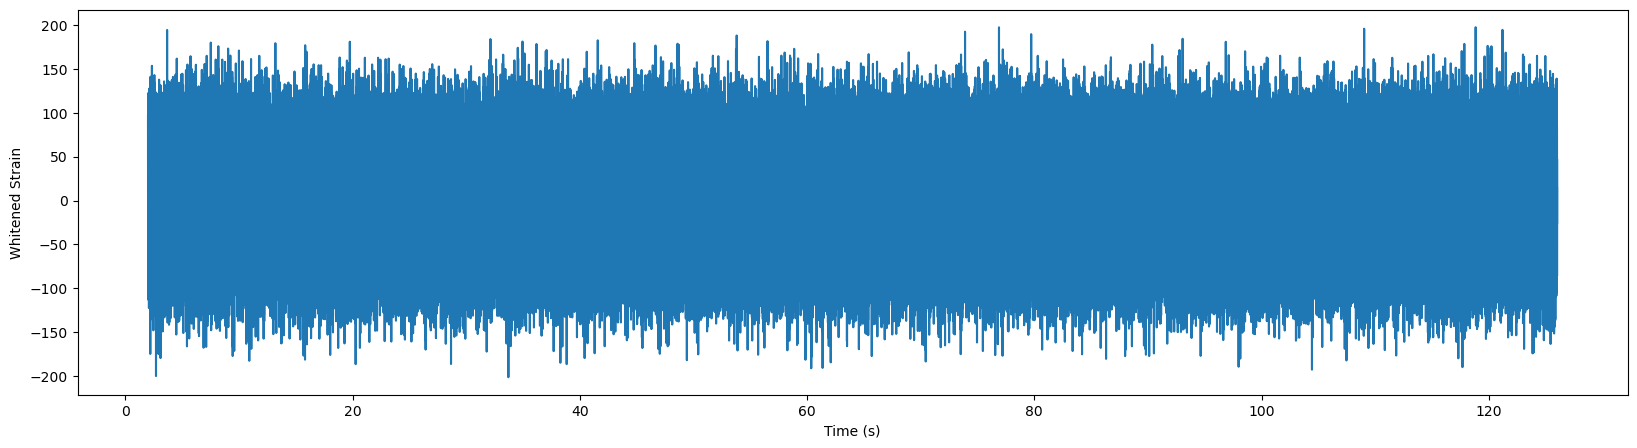

In [6]:
pylab.figure(figsize = (20, 5))
whitened_data = pycbc_t2_0.whiten(4, 4)

pylab.plot(whitened_data.sample_times, whitened_data)

pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.show()

## Bandpass Filter

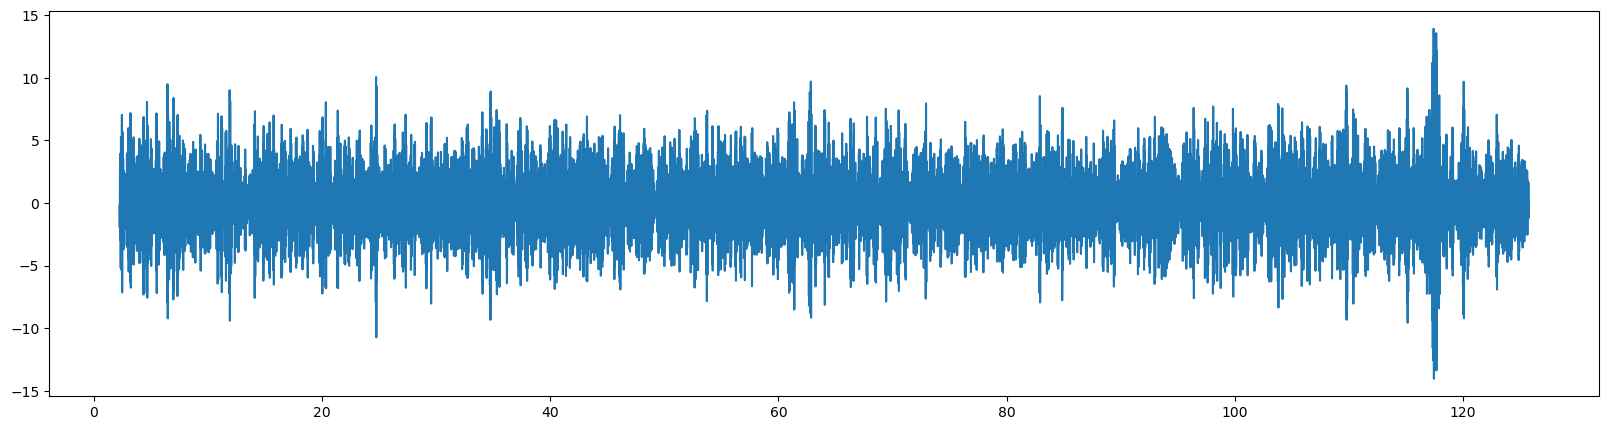

In [7]:
pylab.figure(figsize = (20, 5))
bp_filter_pycbc_t2_0 = whitened_data.highpass_fir(16, 512).lowpass_fir(25, 512)

pylab.plot(bp_filter_pycbc_t2_0.sample_times, bp_filter_pycbc_t2_0)
pylab.show()

In [8]:
print(bp_filter_pycbc_t2_0.start_time)
print(bp_filter_pycbc_t2_0.end_time)

2.25
125.75


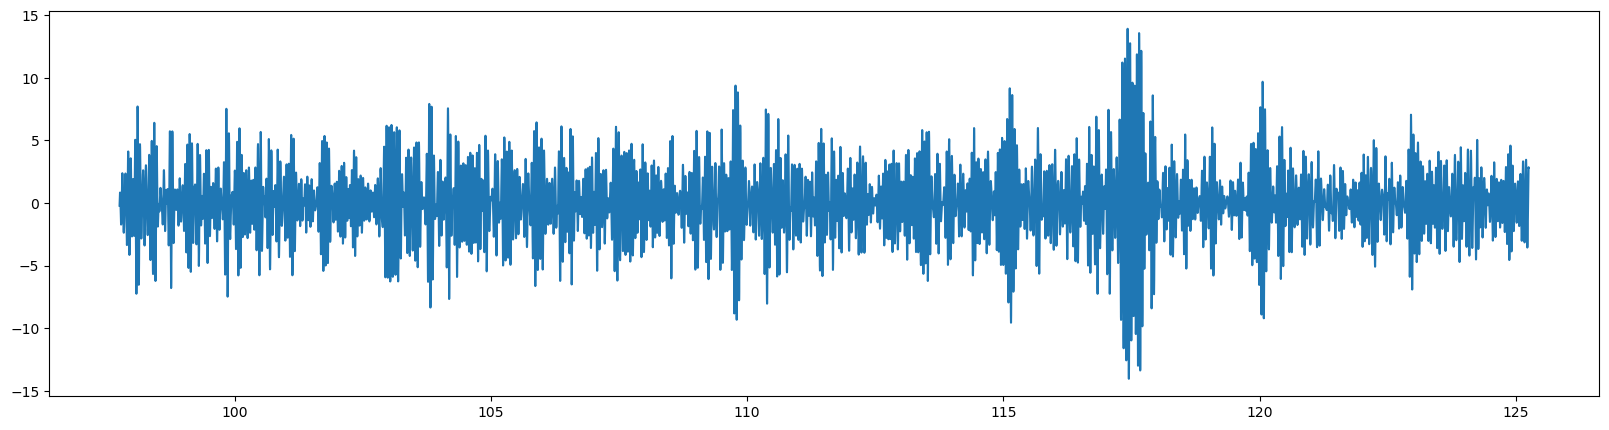

In [9]:
pylab.figure(figsize = (20, 5))

zoom = bp_filter_pycbc_t2_0.time_slice(pycbc_t2_0.start_time + 97.75, pycbc_t2_0.end_time - 2.75)
pylab.plot(zoom.sample_times, zoom)

## Q-Transform Plot

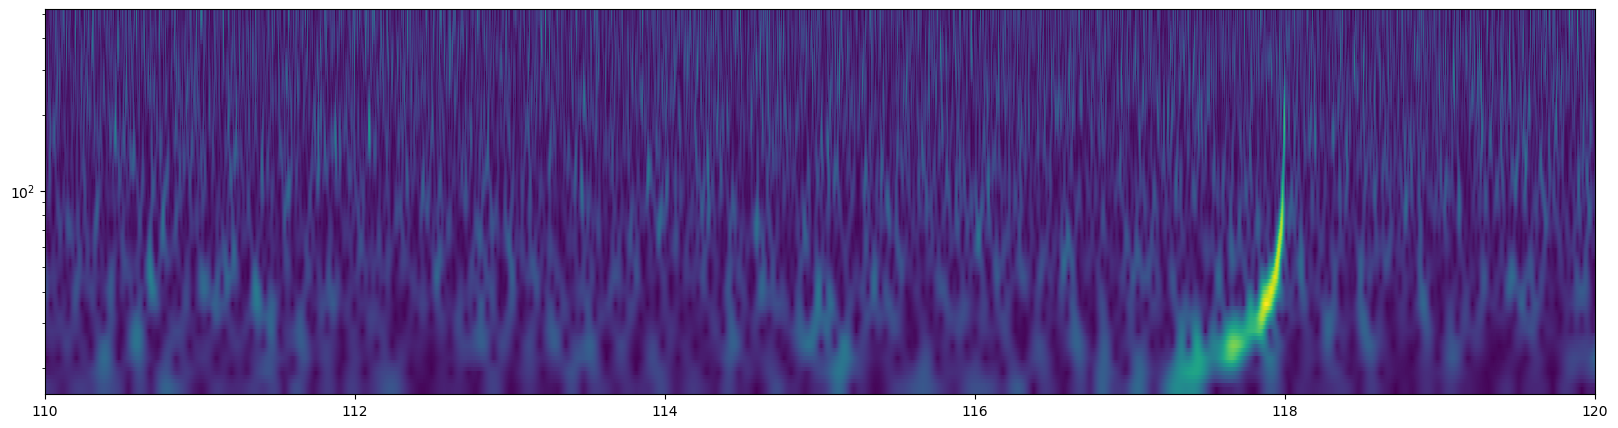

In [10]:
zoom = whitened_data.time_slice(pycbc_t2_0.start_time + 97.75, pycbc_t2_0.end_time - 2.75)
times, freqs, power = zoom.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(16, 512))

pylab.figure(figsize = (20, 5))
pylab.pcolormesh(times, freqs, power**0.5)
pylab.xlim(110, 120)
pylab.yscale('log')

pylab.show()